<a href="https://colab.research.google.com/github/Lorenaps/educacao-brasileira/blob/main/cadernos/lab_politicas_publicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

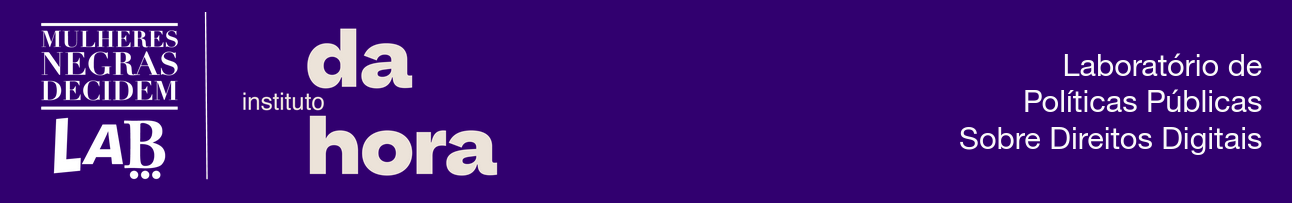

# Laboratório de Políticas Públicas

> Esse caderno de análises foi construído para o 2º encontro do [Laboratório de Políticas Públicas Sobre Direitos Digitais](https://www.instagram.com/reel/CsmhUdMg5hF/?utm_source=ig_web_copy_link&igshid=MzRlODBiNWFlZA%3D%3D) ministrado por Lorena Pereira. O Lab é um projeto das organizações [Mulheres Negras Decidem](https://www.instagram.com/mulheresnegrasdecidem/) & [Instituto da Hora](https://www.instagram.com/instituto_dahora/).  
E nesse encontro iremos experimentar o processo de construção de análises sobre os dados educaionais brasileiros.

### Instruções de uso:
- Fazer uma cópia da base de dados utilizada, que está disponível [nesse arquivo de dados.](https://drive.google.com/file/d/1GXebo6uN3CilaysVjEOyfmEpLDpsU5LF/view?usp=share_link)
- Como de tratam de dados governamentais abertos, é recomendado, para facilitar a execução do código aqui apresentado, o uso da plataforma [*Colaboratory*](https://colab.research.google.com/), que pode ser usada direto do navegador sem ter que fazer instalações adicionais da linguagem de programação Python ou da biblioteca Pandas.
  - Em caso de usar a plataforma *Colaboratory*, recomenda-se fazer a copia do [arquivo de dados](https://drive.google.com/file/d/1GXebo6uN3CilaysVjEOyfmEpLDpsU5LF/view?usp=share_link) direto no Google Drive e habilitar que o *Colaboratory* possa acessar o arquivo diretamente.



*Trazendo as ferramentas necessárias*

In [1]:
import pandas as pd
import altair as alt
from altair.vegalite import Tooltip


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

*Importando a base de dados do censo que comprreende os anos de 2007 até 2022.*

> Os dados foram unificados anteriormente [nesse caderno](https://github.com/Lorenaps/educacao-brasileira/blob/main/etl/censo_escolar.ipynb).

In [2]:
%%time

censo = pd.read_csv('/content/drive/MyDrive/dados/output/baseCensoEscolar_230524.csv', encoding='utf-8')
censo.head(3)

CPU times: user 32.8 s, sys: 15.3 s, total: 48.1 s
Wall time: 58.3 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,NO_ENTIDADE,CO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,TP_SITUACAO_FUNCIONAMENTO,IN_INTERNET,IN_INTERNET_ALUNOS,IN_INTERNET_ADMINISTRATIVO,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_ACESSO_INTERNET_COMPUTADOR,IN_ACES_INTERNET_DISP_PESSOAIS,TP_REDE_LOCAL,IN_BANDA_LARGA,IN_BAS,IN_INF,IN_INF_CRE,IN_INF_PRE,IN_FUND,IN_FUND_AI,IN_FUND_AF,IN_MED,IN_PROF,IN_PROF_TEC,IN_EJA,IN_EJA_FUND,IN_EJA_MED,IN_ESP,IN_ESP_CC,IN_ESP_CE,QT_MAT_BAS,QT_MAT_INF,QT_MAT_FUND,QT_MAT_MED,QT_MAT_PROF,QT_MAT_PROF_TEC,QT_MAT_EJA,QT_MAT_ESP,QT_MAT_BAS_FEM,QT_MAT_BAS_MASC,QT_MAT_BAS_ND,QT_MAT_BAS_BRANCA,QT_MAT_BAS_PRETA,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EIEEF HAP BITT TUPARI,11022558,2,NaN,2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,4.0,4.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,CEEJA LUIZ VAZ DE CAMOES,11024275,2,NaN,1,0.0,1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,200.0,3.0,114.0,86.0,0.0,53.0,5.0,132.0,0.0,10.0,15.0,0.0,0.0,0.0,10.0,0.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMMEF 7 DE SETEMBRO,11024291,3,NaN,2,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,3.0,0.0,6.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [3]:
censo.columns

Index(['NU_ANO_CENSO', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF',
       'NO_MUNICIPIO', 'NO_MESORREGIAO', 'NO_MICRORREGIAO', 'NO_ENTIDADE',
       'CO_ENTIDADE', 'TP_DEPENDENCIA', 'TP_CATEGORIA_ESCOLA_PRIVADA',
       'TP_LOCALIZACAO', 'TP_LOCALIZACAO_DIFERENCIADA',
       'TP_SITUACAO_FUNCIONAMENTO', 'IN_INTERNET', 'IN_INTERNET_ALUNOS',
       'IN_INTERNET_ADMINISTRATIVO', 'IN_INTERNET_APRENDIZAGEM',
       'IN_INTERNET_COMUNIDADE', 'IN_ACESSO_INTERNET_COMPUTADOR',
       'IN_ACES_INTERNET_DISP_PESSOAIS', 'TP_REDE_LOCAL', 'IN_BANDA_LARGA',
       'IN_BAS', 'IN_INF', 'IN_INF_CRE', 'IN_INF_PRE', 'IN_FUND', 'IN_FUND_AI',
       'IN_FUND_AF', 'IN_MED', 'IN_PROF', 'IN_PROF_TEC', 'IN_EJA',
       'IN_EJA_FUND', 'IN_EJA_MED', 'IN_ESP', 'IN_ESP_CC', 'IN_ESP_CE',
       'QT_MAT_BAS', 'QT_MAT_INF', 'QT_MAT_FUND', 'QT_MAT_MED', 'QT_MAT_PROF',
       'QT_MAT_PROF_TEC', 'QT_MAT_EJA', 'QT_MAT_ESP', 'QT_MAT_BAS_FEM',
       'QT_MAT_BAS_MASC', 'QT_MAT_BAS_ND', 'QT_MAT_BAS_BRANCA',
       '

De acordo ao Dicionário de Dados disponível no conjunto de dados do Censo Escolar 2022 do INEP, algumas colunas que podem nos ajudar a entender melhor esse contexto são:

- **TP_DEPENDENCIA**: Que descreve a Dependência Administrativa e tem como referência os valores (1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada);  

- **TP_LOCALIZACAO**: Indica se a escola está localizada em zona urbana ou rual (1 - Urbana, 2 - Rural);  

- **QT_MAT_BAS**: Que descreve o Número de Matrículas na Educação Básica;  

- **IN_BAS**: Que descreve se existe uma ou mais matrículas para Educação Básica (0 - Não, 1 - Sim);  

- **TP_SITUACAO_FUNCIONAMENTO**: Situação de funcionamento (1 - Em Atividade, 2 - Paralisada, 3 - Extinta (ano do Censo), 4 - Extinta em Anos Anteriores);  

- **IN_INTERNET**: Se existe acesso a Internet (0 - Não, 1 - Sim);  

*Filtrando os registros do censo que tratam das escolas ativas e que possuem 1 ou mais matrículas na Educação Básica e subsitituindo os códigos descritores:*

In [4]:
dados = censo.loc[(censo['TP_SITUACAO_FUNCIONAMENTO'] == 1) & (censo['IN_BAS'] == 1)]

dados.loc[dados['TP_DEPENDENCIA'] == 1, ['TP_DEPENDENCIA']] = 'Federal'
dados.loc[dados['TP_DEPENDENCIA'] == 2, ['TP_DEPENDENCIA']] = 'Estadual'
dados.loc[dados['TP_DEPENDENCIA'] == 3, ['TP_DEPENDENCIA']] = 'Municipal'
dados.loc[dados['TP_DEPENDENCIA'] == 4, ['TP_DEPENDENCIA']] = 'Privada'

dados.loc[dados['TP_LOCALIZACAO'] == 1, ['TP_LOCALIZACAO']] = 'Urbana'
dados.loc[dados['TP_LOCALIZACAO'] == 2, ['TP_LOCALIZACAO']] = 'Rural'

dados.loc[dados['IN_INTERNET'] == 1.0, ['IN_INTERNET']] = 'Sim'
dados.loc[dados['IN_INTERNET'] == 0.0, ['IN_INTERNET']] = 'Não'

## Vamos para as nossas perguntas:

### 1. Como se dividem as matrículas por dependência administrativa?

In [5]:
analise = dados[['TP_DEPENDENCIA', 'QT_MAT_BAS']]
analise.head(5)

,TP_DEPENDENCIA,QT_MAT_BAS
0,Estadual,6.0
1,Estadual,200.0
2,Municipal,9.0
3,Municipal,118.0
4,Municipal,161.0


In [6]:
analise = analise.groupby(['TP_DEPENDENCIA']).sum().reset_index()
analise

,TP_DEPENDENCIA,QT_MAT_BAS
0,Estadual,283157756.0
1,Federal,5101413.0
2,Municipal,374078519.0
3,Privada,133283903.0


In [7]:
analise = analise.sort_values('QT_MAT_BAS', ascending=False)
analise

,TP_DEPENDENCIA,QT_MAT_BAS
2,Municipal,374078519.0
0,Estadual,283157756.0
3,Privada,133283903.0
1,Federal,5101413.0


In [8]:
analise = analise.style.format({"QT_MAT_BAS": "{:,}"})
analise

,TP_DEPENDENCIA,QT_MAT_BAS
2,Municipal,"374,078,519.0"
0,Estadual,"283,157,756.0"
3,Privada,"133,283,903.0"
1,Federal,"5,101,413.0"


In [9]:
analise = dados.loc[dados['NU_ANO_CENSO'] == 2022][['TP_DEPENDENCIA', 'QT_MAT_BAS']]
analise.groupby(['TP_DEPENDENCIA']).sum().reset_index().sort_values('QT_MAT_BAS', ascending=False).style.format({"QT_MAT_BAS": "{:,}"})

,TP_DEPENDENCIA,QT_MAT_BAS
2,Municipal,"23,240,028.0"
0,Estadual,"14,761,395.0"
3,Privada,"9,000,046.0"
1,Federal,"380,605.0"


In [10]:
analise = dados[['TP_DEPENDENCIA', 'QT_MAT_BAS', 'NU_ANO_CENSO']]
analise = analise.groupby(['TP_DEPENDENCIA', 'NU_ANO_CENSO']).sum().reset_index().sort_values(['NU_ANO_CENSO', \
                                                                             'QT_MAT_BAS'], ascending=False)
analise

,TP_DEPENDENCIA,NU_ANO_CENSO,QT_MAT_BAS
47,Municipal,2022,23240028.0
15,Estadual,2022,14761395.0
63,Privada,2022,9000046.0
31,Federal,2022,380605.0
46,Municipal,2021,23135793.0
14,Estadual,2021,15019116.0
62,Privada,2021,8136345.0
30,Federal,2021,377147.0
45,Municipal,2020,22898611.0
13,Estadual,2020,15199500.0


In [11]:
alt.Chart(analise).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Ano'),
    y = alt.Y('QT_MAT_BAS', title='Matrículas'),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).properties(
width=500,
height=500
).interactive()

alt.Chart(...)

### 2.   Como se dividem as escolas por dependência administrativa?

In [12]:
analise = dados[['TP_DEPENDENCIA', 'CO_ENTIDADE', 'NU_ANO_CENSO']]
analise = analise.groupby(['TP_DEPENDENCIA', 'NU_ANO_CENSO']).count().reset_index().rename(columns={'CO_ENTIDADE': 'QTD_ESCOLA'})
analise.sort_values(['NU_ANO_CENSO', 'QTD_ESCOLA'], ascending=False).style.format({"QTD_ESCOLA": "{:,}"})

,TP_DEPENDENCIA,NU_ANO_CENSO,QTD_ESCOLA
47,Municipal,2022,"107,099"
63,Privada,2022,"41,011"
15,Estadual,2022,"29,536"
31,Federal,2022,700
46,Municipal,2021,"107,457"
62,Privada,2021,"40,542"
14,Estadual,2021,"29,675"
30,Federal,2021,696
45,Municipal,2020,"107,899"
61,Privada,2020,"41,046"


In [13]:
alt.Chart(analise).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Ano'),
    y = alt.Y('QTD_ESCOLA', title='Quantidade de escolas'),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QTD_ESCOLA', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).properties(
width=500,
height=500
).interactive()

alt.Chart(...)

### 3. Como podemos expandir essa análise para os territórios?

In [14]:
analise = dados.loc[dados['NU_ANO_CENSO'] == 2022][['QT_MAT_BAS', 'NO_REGIAO']]
analise.groupby(['NO_REGIAO']).sum().reset_index().sort_values(['QT_MAT_BAS'], ascending=False).style.format({"QT_MAT_BAS": "{:,}"})

,NO_REGIAO,QT_MAT_BAS
3,Sudeste,"18,717,083.0"
1,Nordeste,"13,767,582.0"
4,Sul,"6,441,704.0"
2,Norte,"4,812,754.0"
0,Centro-Oeste,"3,642,951.0"


In [15]:
analise = dados[['TP_DEPENDENCIA', 'QT_MAT_BAS', 'NU_ANO_CENSO', 'NO_REGIAO']]
analise = analise.groupby(['TP_DEPENDENCIA', \
                           'NU_ANO_CENSO', \
                           'NO_REGIAO']).sum().reset_index().sort_values(['QT_MAT_BAS'], ascending=False)

In [16]:
norte = analise.loc[analise['NO_REGIAO'] == 'Norte']
nordeste = analise.loc[analise['NO_REGIAO'] == 'Nordeste']
centro = analise.loc[analise['NO_REGIAO'] == 'Centro-Oeste']
sul = analise.loc[analise['NO_REGIAO'] == 'Sul']
sudeste = analise.loc[analise['NO_REGIAO'] == 'Sudeste']

titulo = 'Matrículas'

gNorte = alt.Chart(norte).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Norte'),
    y = alt.Y('QT_MAT_BAS', title=titulo, scale={'domain': (0, 10000000)}),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

gNordeste = alt.Chart(nordeste).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Nordeste'),
    y = alt.Y('QT_MAT_BAS', title=titulo, scale={'domain': (0, 10000000)}),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

gCentro = alt.Chart(centro).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Centro-Oeste'),
    y = alt.Y('QT_MAT_BAS', title=titulo, scale={'domain': (0, 10000000)}),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

gSudeste = alt.Chart(sudeste).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Sudeste'),
    y = alt.Y('QT_MAT_BAS', title=titulo, scale={'domain': (0, 10000000)}),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

gSul = alt.Chart(sul).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Sul'),
    y = alt.Y('QT_MAT_BAS', title=titulo, scale={'domain': (0, 10000000)}),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

gSudeste | gNordeste | gSul | gNorte | gCentro 

alt.HConcatChart(...)

#### Olhando por estado:

In [17]:
analise = dados[['TP_DEPENDENCIA', 'QT_MAT_BAS', 'NU_ANO_CENSO', 'NO_UF']]
analise = analise.groupby(['TP_DEPENDENCIA', \
                           'NU_ANO_CENSO', \
                           'NO_UF']).sum().reset_index().sort_values(['NO_UF', \
                                                                      'NU_ANO_CENSO', \
                                                                      'QT_MAT_BAS'], ascending=False)

In [18]:
filtro = 'Bahia'

estado = analise.loc[analise['NO_UF'] == filtro]

alt.Chart(estado).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title=filtro),
    y = alt.Y('QT_MAT_BAS', title=titulo),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

alt.Chart(...)

### Olhando por cidade:

In [19]:
analise = dados[['TP_DEPENDENCIA', 'QT_MAT_BAS', 'NU_ANO_CENSO', 'NO_MUNICIPIO']]
analise = analise.groupby(['TP_DEPENDENCIA', \
                           'NU_ANO_CENSO', \
                           'NO_MUNICIPIO']).sum().reset_index().sort_values(['NO_MUNICIPIO', \
                                                                      'NU_ANO_CENSO', \
                                                                      'QT_MAT_BAS'], ascending=False)

In [20]:
filtro = 'Caicó' # Salvador, Feira de Santana, Campina Grande, Caicó e Recife

cidade = analise.loc[analise['NO_MUNICIPIO'] == filtro]

alt.Chart(cidade).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title=filtro),
    y = alt.Y('QT_MAT_BAS', title=titulo),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

alt.Chart(...)

In [21]:
filtro = 'Duque de Caxias' # São Paulo, Duque de Caxias, Rio de Janeiro e Minas Gerais

cidade = analise.loc[analise['NO_MUNICIPIO'] == filtro]

alt.Chart(cidade).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title=filtro),
    y = alt.Y('QT_MAT_BAS', title=titulo),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

alt.Chart(...)

In [22]:
filtro = 'Belém' # Belém, Ananindeua, Santarém, Manaus e Cruzeiro do Sul

cidade = analise.loc[analise['NO_MUNICIPIO'] == filtro]

alt.Chart(cidade).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title=filtro),
    y = alt.Y('QT_MAT_BAS', title=titulo),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

alt.Chart(...)

In [23]:
filtro = 'Porto Alegre' # Porto Alegre, Florianópolis, São Borja e Curitiba

cidade = analise.loc[analise['NO_MUNICIPIO'] == filtro]

alt.Chart(cidade).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title=filtro),
    y = alt.Y('QT_MAT_BAS', title=titulo),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

alt.Chart(...)

In [24]:
filtro = 'Sinop' # Goiânia, Sinop, Cáceres e Cuiabá

cidade = analise.loc[analise['NO_MUNICIPIO'] == filtro]

alt.Chart(cidade).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title=filtro),
    y = alt.Y('QT_MAT_BAS', title=titulo),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

alt.Chart(...)

### Olhando no detalhe cada escola

In [25]:
cidade = 'Feira de Santana'
ano = 2022

analise = dados.loc[(dados['NO_MUNICIPIO'] == cidade) & (dados['NU_ANO_CENSO'] == ano)]

len(analise)

418

In [26]:
analise[['NO_ENTIDADE', 'TP_DEPENDENCIA', 'TP_CATEGORIA_ESCOLA_PRIVADA', \
         'QT_MAT_BAS', 'TP_LOCALIZACAO', 'IN_INTERNET']].sort_values(['QT_MAT_BAS'], ascending=False).head(10)

,NO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,QT_MAT_BAS,TP_LOCALIZACAO,IN_INTERNET
90860,CENTRO INTEGRADO DE EDUCACAO ASSIS CHATEAUBRIAND,Estadual,NaN,2871.0,Urbana,Sim
90970,INSTITUTO DE EDUCACAO GASTAO GUIMARAES TEMPO I...,Estadual,NaN,2008.0,Urbana,Sim
90863,COLEGIO ESTADUAL EDITH MACHADO BOAVENTURA,Estadual,NaN,1910.0,Urbana,Sim
90889,COLEGIO ESTADUAL PAULO VI TEMPO INTEGRAL,Estadual,NaN,1877.0,Urbana,Sim
90851,COLEGIO ESTADUAL GOVERNADOR LUIZ VIANA FILHO,Estadual,NaN,1745.0,Urbana,Sim
91169,COLEGIO MODELO LUIS EDUARDO MAGALHAES TEMPO IN...,Estadual,NaN,1721.0,Urbana,Sim
90928,COLEGIO ESTADUAL CAROLINA MARIA DE JESUS,Estadual,NaN,1659.0,Urbana,Sim
90864,CENTRO ESTADUAL DE EDUCACAO PROFISSIONAL EM SA...,Estadual,NaN,1560.0,Urbana,Sim
91323,SENAI FEIRA DE SANTANA,Privada,1.0,1554.0,Urbana,Sim
90865,COLEGIO ESTADUAL JOSE FERREIRA PINTO,Estadual,NaN,1342.0,Urbana,Sim


In [27]:
analise[['NO_ENTIDADE', 'TP_DEPENDENCIA', 'QT_MAT_BAS', 'QT_MAT_BAS_FEM', 'QT_MAT_BAS_MASC', 'QT_DOC_BAS']].sort_values(['QT_MAT_BAS'], ascending=False).head(10)

,NO_ENTIDADE,TP_DEPENDENCIA,QT_MAT_BAS,QT_MAT_BAS_FEM,QT_MAT_BAS_MASC,QT_DOC_BAS
90860,CENTRO INTEGRADO DE EDUCACAO ASSIS CHATEAUBRIAND,Estadual,2871.0,1309.0,1562.0,88.0
90970,INSTITUTO DE EDUCACAO GASTAO GUIMARAES TEMPO I...,Estadual,2008.0,1107.0,901.0,69.0
90863,COLEGIO ESTADUAL EDITH MACHADO BOAVENTURA,Estadual,1910.0,932.0,978.0,53.0
90889,COLEGIO ESTADUAL PAULO VI TEMPO INTEGRAL,Estadual,1877.0,800.0,1077.0,136.0
90851,COLEGIO ESTADUAL GOVERNADOR LUIZ VIANA FILHO,Estadual,1745.0,827.0,918.0,58.0
91169,COLEGIO MODELO LUIS EDUARDO MAGALHAES TEMPO IN...,Estadual,1721.0,929.0,792.0,72.0
90928,COLEGIO ESTADUAL CAROLINA MARIA DE JESUS,Estadual,1659.0,735.0,924.0,54.0
90864,CENTRO ESTADUAL DE EDUCACAO PROFISSIONAL EM SA...,Estadual,1560.0,1346.0,214.0,70.0
91323,SENAI FEIRA DE SANTANA,Privada,1554.0,460.0,1094.0,47.0
90865,COLEGIO ESTADUAL JOSE FERREIRA PINTO,Estadual,1342.0,624.0,718.0,45.0


In [28]:
analise[['NO_ENTIDADE', 'TP_DEPENDENCIA', 'QT_MAT_BAS', 'QT_MAT_BAS_ND', 'QT_MAT_BAS_BRANCA', \
         'QT_MAT_BAS_PRETA', 'QT_MAT_BAS_PARDA', 'QT_MAT_BAS_AMARELA', 'QT_MAT_BAS_INDIGENA']].sort_values(['QT_MAT_BAS'], ascending=False).head(10)

,NO_ENTIDADE,TP_DEPENDENCIA,QT_MAT_BAS,QT_MAT_BAS_ND,QT_MAT_BAS_BRANCA,QT_MAT_BAS_PRETA,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA
90860,CENTRO INTEGRADO DE EDUCACAO ASSIS CHATEAUBRIAND,Estadual,2871.0,402.0,121.0,297.0,2031.0,7.0,13.0
90970,INSTITUTO DE EDUCACAO GASTAO GUIMARAES TEMPO I...,Estadual,2008.0,445.0,59.0,399.0,1100.0,3.0,2.0
90863,COLEGIO ESTADUAL EDITH MACHADO BOAVENTURA,Estadual,1910.0,833.0,37.0,144.0,889.0,6.0,1.0
90889,COLEGIO ESTADUAL PAULO VI TEMPO INTEGRAL,Estadual,1877.0,484.0,25.0,145.0,1214.0,2.0,7.0
90851,COLEGIO ESTADUAL GOVERNADOR LUIZ VIANA FILHO,Estadual,1745.0,562.0,152.0,223.0,802.0,4.0,2.0
91169,COLEGIO MODELO LUIS EDUARDO MAGALHAES TEMPO IN...,Estadual,1721.0,520.0,86.0,198.0,903.0,5.0,9.0
90928,COLEGIO ESTADUAL CAROLINA MARIA DE JESUS,Estadual,1659.0,338.0,83.0,332.0,888.0,16.0,2.0
90864,CENTRO ESTADUAL DE EDUCACAO PROFISSIONAL EM SA...,Estadual,1560.0,550.0,58.0,290.0,651.0,2.0,9.0
91323,SENAI FEIRA DE SANTANA,Privada,1554.0,70.0,158.0,514.0,780.0,31.0,1.0
90865,COLEGIO ESTADUAL JOSE FERREIRA PINTO,Estadual,1342.0,175.0,24.0,116.0,1020.0,7.0,0.0


2.   Como se dá o acesso a internet das escolas que cobrem todo o território nacional?

In [29]:
analise = dados[['CO_ENTIDADE', 'NU_ANO_CENSO', 'IN_INTERNET']]
analise = analise.groupby(['NU_ANO_CENSO', 'IN_INTERNET']).count().reset_index().rename(columns={'CO_ENTIDADE': 'QTD_ESCOLA'})

analise.head(3)

,NU_ANO_CENSO,IN_INTERNET,QTD_ESCOLA
0,2007,Não,140317
1,2007,Sim,58080
2,2008,Não,129252


In [30]:
alt.Chart(analise).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Anos'),
    y = alt.Y('QTD_ESCOLA', title='Quantidade de escolas'),
    color = alt.Color('IN_INTERNET', title="Acesso a Internet"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QTD_ESCOLA', format=','),
              alt.Tooltip('IN_INTERNET')]
).interactive()

alt.Chart(...)

In [31]:
analise = dados[['CO_ENTIDADE', 'NU_ANO_CENSO', 'IN_INTERNET', 'NO_UF']]
analise = analise.groupby(['NU_ANO_CENSO', 'IN_INTERNET', 'NO_UF']).count().reset_index().rename(columns={'CO_ENTIDADE': 'QTD_ESCOLA'})

analise.head(3)

,NU_ANO_CENSO,IN_INTERNET,NO_UF,QTD_ESCOLA
0,2007,Não,Acre,1550
1,2007,Não,Alagoas,3051
2,2007,Não,Amapá,670


In [32]:
filtro = 'Maranhão'

estado = analise.loc[analise['NO_UF'] == filtro]

alt.Chart(estado).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title=filtro),
    y = alt.Y('QTD_ESCOLA', title='Escolas'),
    color = alt.Color('IN_INTERNET', title="Acesso a Internet"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QTD_ESCOLA', format=','),
              alt.Tooltip('IN_INTERNET')]
).interactive()

alt.Chart(...)

In [33]:
filtro = 'Santa Catarina'

estado = analise.loc[analise['NO_UF'] == filtro]

alt.Chart(estado).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title=filtro),
    y = alt.Y('QTD_ESCOLA', title='Escolas'),
    color = alt.Color('IN_INTERNET', title="Acesso a Internet"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QTD_ESCOLA', format=','),
              alt.Tooltip('IN_INTERNET')]
).interactive()

alt.Chart(...)